# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


** Read in the csv file as a dataframe called df **

In [5]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [8]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

** What are the top 5 zipcodes for 911 calls? **

In [10]:
df['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [13]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [14]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** how many unique title codes are there? **

In [16]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [17]:
R = df['title'].iloc[0]

In [20]:
R.split(':')[0]

'EMS'

In [22]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [23]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [25]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

** Use seaborn to create a countplot of 911 calls by Reason. **

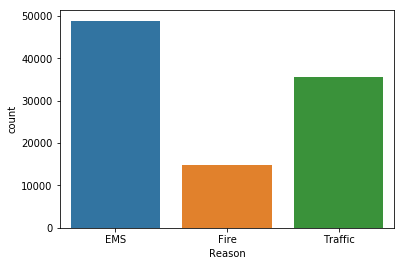

In [26]:
sns.countplot(x = 'Reason', data =  df)

___
**  What is the data type of the objects in the timeStamp column? **

In [28]:
type(df['timeStamp'])

pandas.core.series.Series

In [29]:
type(df['timeStamp'].iloc[0])

str

** Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [31]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [32]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

** Grab specific attributes from a Datetime object by calling them**

**Use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. Create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [34]:
df['Hour'] = df['timestamp'].apply(lambda time: time.hour)

KeyError: 'timestamp'

In [36]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [37]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [38]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [40]:
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
Hour         99492 non-null int64
Month        99492 non-null int64
Day          99492 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


** The Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

   

In [42]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)

In [46]:
df['Day'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

**Uuse seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

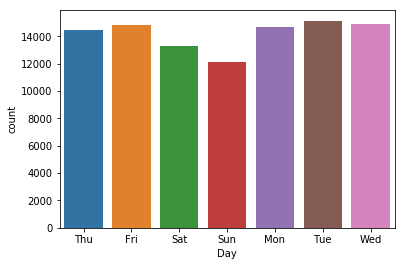

In [49]:
sns.countplot(x = 'Day', data=df)

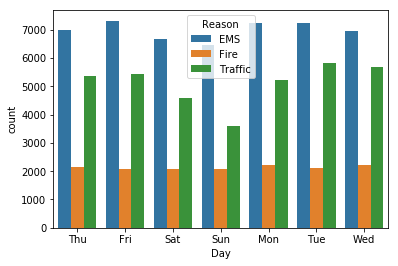

In [51]:
sns.countplot(x = 'Day', data=df, hue = 'Reason')

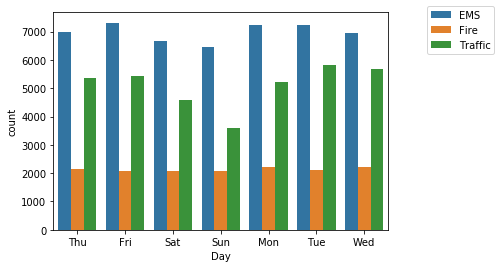

In [52]:
sns.countplot(x = 'Day', data=df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.1, 1.05))

**For Month:**

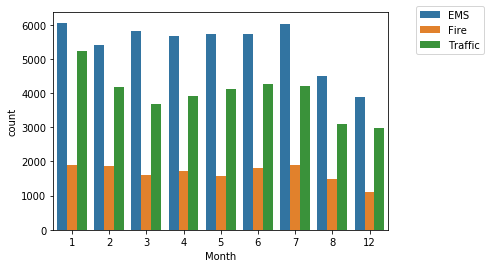

In [58]:
sns.countplot(x = 'Month', data=df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.3, 1.05))

** The plot was missing some Months, fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.. **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [61]:
m =df.groupby('Month').count()

In [62]:
m.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour    Day  
Month                        
1       13205  13205  13205  
2       11467  11467  11467  
3       11101  11101  11101  
4       11326  11326  11326  
5       11423  11423  11423

** Create a simple plot off of the dataframe indicating the count of calls per month. **

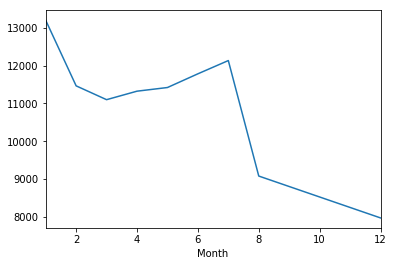

In [64]:
m['lat'].plot()

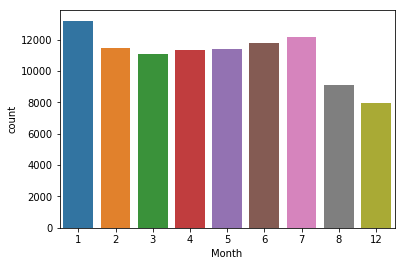

In [66]:
sns.countplot(x = 'Month', data=df)
plt.legend(bbox_to_anchor=(1.3, 1.05))

** Use seaborn's lmplot() to create a linear fit on the number of calls per month. **

In [67]:
sns.lmplot(x='Month', y='twp', data = m)

KeyError: "['Month'] not in index"

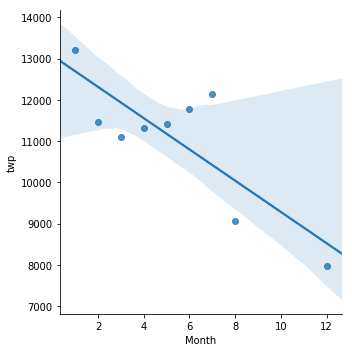

In [68]:
sns.lmplot(x='Month', y='twp', data = m.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [71]:
d=df['timeStamp'].iloc[0]


In [74]:
df['Date'] = df['timeStamp'].apply(lambda d:d.date())

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
Hour         99492 non-null int64
Month        99492 non-null int64
Day          99492 non-null object
Date         99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [76]:
df.groupby('Date').count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
Date                                                                        
2015-12-10  115  115   115  100    115        115  115   113  115     115   
2015-12-11  396  396   396  333    396        396  395   391  396     396   
2015-12-12  403  403   403  333    403        403  403   401  403     403   
2015-12-13  319  319   319  280    319        319  319   317  319     319   
2015-12-14  447  447   447  387    447        447  446   445  447     447   

            Hour  Month  Day  
Date                          
2015-12-10   115    115  115  
2015-12-11   396    396  396  
2015-12-12   403    403  403  
2015-12-13   319    319  319  
2015-12-14   447    447  447

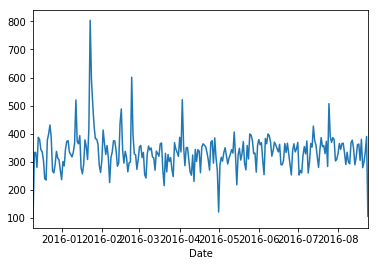

In [81]:
df.groupby('Date').count()['zip'].plot()

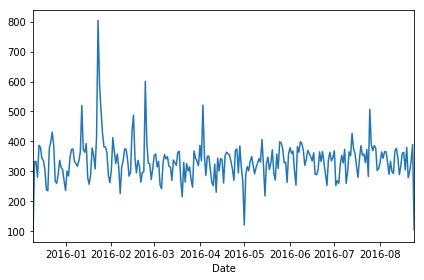

In [82]:
df.groupby('Date').count()['zip'].plot()
plt.tight_layout()

** Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

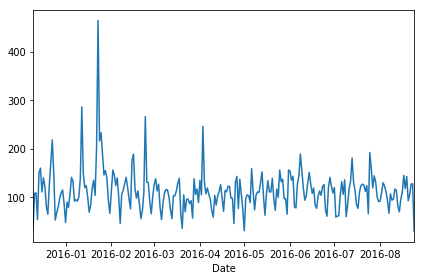

In [83]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['zip'].plot()
plt.tight_layout()

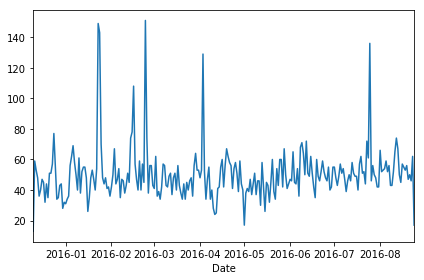

In [84]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['zip'].plot()
plt.tight_layout()

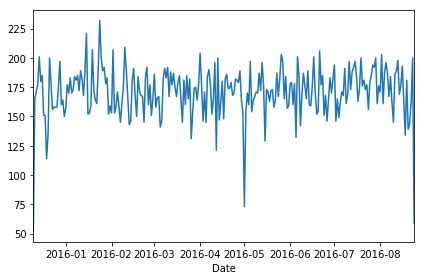

In [86]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['zip'].plot()
plt.tight_layout()

____
** Create  heatmaps with seaborn and the data. First restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [91]:
df.groupby(by=['Day','Hour']).count()['Reason'].unstack()

Hour   0    1    2    3    4    5    6    7    8    9  ...    14   15    16  \
Day                                                    ...                    
Fri   275  235  191  175  201  194  372  598  742  752 ...   932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786 ...   869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640 ...   789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620 ...   684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828 ...   876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880 ...   943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808 ...   904  867   990   

Hour    17   18   19   20   21   22   23  
Day                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  
Tue   1019  905  731  647  571  462  274  
Wed   1037  894  686  668  575  490  335  

[7 rows x 24 columns]

In [92]:
h=df.groupby(by=['Day','Hour']).count()['Reason'].unstack()

** Create a HeatMap using this new DataFrame. **

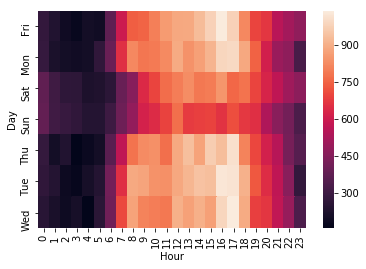

In [93]:
sns.heatmap(h)

**Create a clustermap using this DataFrame. **

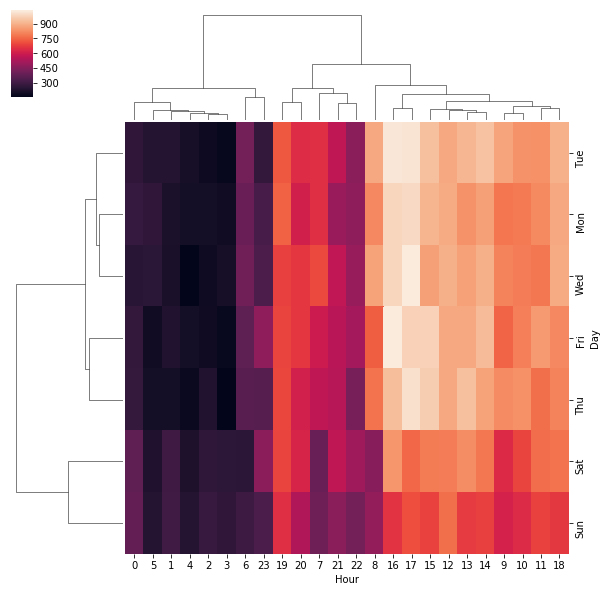

In [94]:
sns.clustermap(h)

** Repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [96]:
df.groupby(by=['Day','Month']).count()['Reason'].unstack()

Month    1     2     3     4     5     6     7     8     12
Day                                                        
Fri    1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon    1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat    2291  1441  1266  1734  1444  1388  1695  1099   978
Sun    1960  1229  1102  1488  1424  1333  1672  1021   907
Thu    1584  1596  1900  1601  1590  2065  1646  1230  1266
Tue    1973  1753  1884  1430  1918  1676  1670  1612  1234
Wed    1700  1903  1889  1517  1538  2058  1717  1295  1262

In [97]:
m=df.groupby(by=['Day','Month']).count()['Reason'].unstack()

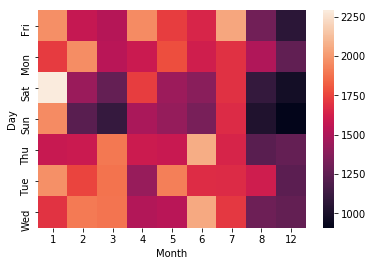

In [98]:
sns.heatmap(m)

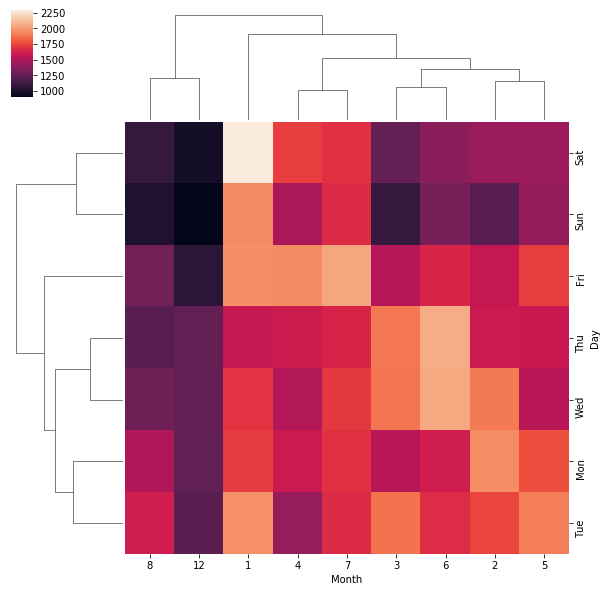

In [99]:
sns.clustermap(m)